>Bienvenue dans le projet Investigating a Dataset !
Dans ce cahier nous allons essayer de faire l'analyse des données d'un ensemble de données sélectionné parmi lesquelles nous avons proposé dans le projet

# Project: Investigate a Dataset - [Dataset-name]

## Table of Contents
<ol>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ol>

<a id='intro'></a>
## 1. Introduction

### 1.1. Dataset Description 

>Pour ce rapport, nous avons choisi d'analyser **les données de film TMDb**.

<p>Cet ensemble de données contient des informations sur 10 000 films collectés à partir de The Movie Database (TMDb), y compris les notes des utilisateurs et les revenus.</p>

<p>Certaines colonnes, comme 'cast' et 'genres', contiennent plusieurs valeurs séparées par des caractères pipe ( | ).
Il y a des caractères étranges dans la colonne 'cast'. Ne vous souciez pas de les nettoyer. Vous pouvez les laisser tels quels.
Les deux dernières colonnes se terminant par « _adj »  affichent le budget et les revenus du film associé en dollars de 2010, en tenant compte de l'inflation au fil du temps.</p>




### 1.2. Question(s) for Analysis
>Afin  de faire d'analyser notre ensembles de données nous allons essayer de répondre à ces questions suivantes .
    <ol>
        <li> Quel est l'acteur qui a le plus joué de films</li>
         <li>Quel le film qui a fait le plus de  profit ?</li>
    </ol>



In [1]:
# Dans cette cellule nous allons importer les différents paquets dont 
# nous aurons besoin tout au long de ce rapport comme le bibliothèque de python 
# numpy pour travailler avec les tableaux ,la bibliohtèque pandas pour analyser
#les données et afin la bibliothèque matplotlib et seaborn pour les visualisations
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns


In [2]:
 
#!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## 2. Data Wrangling

>  Dans cette section du rapport, nous allons  importer  les données que analyserons ensuite nous allons vérifier leur propreté , les nettoyer si besoin , les ajuster s 'il ya des données manquantes. 


### 2.1. General Properties

In [3]:
# Nous chargerons ici notre ensemble de données , nous ferons aussi une copie 
# de cet ensemble.
# faire une liste de types de valeurs manquantes avec missing_values prenant 
#prenant les valeurs standards et non standards 
missing_values = ["n/a", "na", "--"]
df = pd.read_csv('Database_TMDb_movie_data/tmdb-movies.csv', na_values = missing_values)
#df = pd.read_csv('Database_TMDb_movie_data/tmdb-movies.csv') 
cp = df.copy()



>pour éviter de nuire à l'intégrité de notre ensemble de données principal,j'ai décidé de travailler avec une copie ce dernier.

In [4]:
#cette instruction nous permettra de connaitre les nombre de lignes et de 
#colonnes de notre ensemble de données 
cp.shape

(10866, 21)

In [5]:
cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [6]:
cp.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [7]:
cp.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

  > Ci dessus nous avons essayer de tirer quelques informations générales avec les données que l'on a choisi , après bréve analyse nous constatons que notre ensemble des données contient 10866 lignes et 21 colonnes.
  on a pu aussi avec dtypes identifier les colonnes à variables numériques et les variables catégorielles qui seront plus tard important dans notre nettoyage de données

In [8]:
#avec cette instruction nous allons identifier les colonnes  avec des valeurs
#leurs  nombre de valeurs nulles. 
cp.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [9]:
cp.duplicated().sum()

1

In [10]:
duplicateRows = cp[cp.duplicated()]
duplicateRows 

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


>Après avoir fait une analyse générale de notre dataset nous avons remarqué qu'il comporte 10866 lignes et 21 colonnes parmi ces 21 colonnes il y'en a 10 qui comporte des valeurs non nulles standards , on constate aussi qu'il ya un doublon (2089 et 2090 contiennent exactement les memes données) .
Ces incohérences peuvent nuire à l'exactitude ou la justesse de notre analyse , afin d'éviter cela nous allons dans la prochaine étape passer à ce qu'on appelle le data-preprocessing ou data cleaning c'est à dire le nettoyage de nos données afin de pouvoir passer à son analyse. 
on remarque aussi que la date n'est pas en format date , on le corrigera ultérieurement.



### 2. Data Cleaning
> Au niveau de cette section  nous allons essayer de corriger les données c'est à dire régler les irrégularités observées au niveau de la section précédente (le data wrangling)

 

In [11]:
# Pour le nettoyage des données nous allons d'abord commencer par la suppression
#du doublon 
cp = cp.drop_duplicates()


In [12]:
# Vérifions que le doublon a été supprimé 

cp[cp.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj


In [13]:
# recherchons le pourcentage des données manquantes par variable 
prtc_manquants = cp.isnull().sum()*100/cp.shape[0] 
prtc_manquants


id                       0.000000
imdb_id                  0.092039
popularity               0.000000
budget                   0.000000
revenue                  0.000000
original_title           0.000000
cast                     0.699494
homepage                72.977451
director                 0.404970
tagline                 25.991717
keywords                13.741371
overview                 0.036815
runtime                  0.000000
genres                   0.211689
production_companies     9.479982
release_date             0.000000
vote_count               0.000000
vote_average             0.000000
release_year             0.000000
budget_adj               0.000000
revenue_adj              0.000000
dtype: float64

In [14]:

#supression colonne Homepage , tagline,keywords
cp.drop( ["homepage","tagline","keywords"], axis = 1 , inplace = True)

In [15]:
#remplacement par 0 des lignes vides dans imbd_id 
cp['imdb_id'].fillna(0 , inplace = True)


In [16]:
#remplacement des lignes vides dans genres par le mode 
mode = ''.join(cp['genres'].mode())
cp['genres'].fillna(mode, inplace=True)


In [17]:
#changement de release_date en format date 
cp['release_date'] = pd.to_datetime(cp['release_date'])

> Dans cette cellule nous avons nettoyé nos données pour pouvoir enfin répondre aux questions que nous nous sommes posés auparavant .
Nous avons avons supprimé le doublon mais nous avons aussi 
> <ul>
     <li>supprimer les colonnes "Home Page" , "Tag line " et "Key words " ,        elles contiennent beaucoup de valeurs manquantes et on en a pas besoin          pour notre analyse </li>
    <li>supprimer des lignes avec des valeus maquantes</li>
    <li>Remplacer des valeurs maquantes par d'autres valeurs soit le mode pour les variables catégorielles ou par des valeurs que l'on a nous meme choisi</li>

<a id='eda'></a>
## 3.  Exploratory Data Analysis

> Après avoir corriger les données , passons donc à leur exploration afin de répondre à nos questions posées précédemment dans la partie introduction .

### 3.1.  Recherche  pour la question 1 (Quel est l'acteur qui a le plus joué de films)

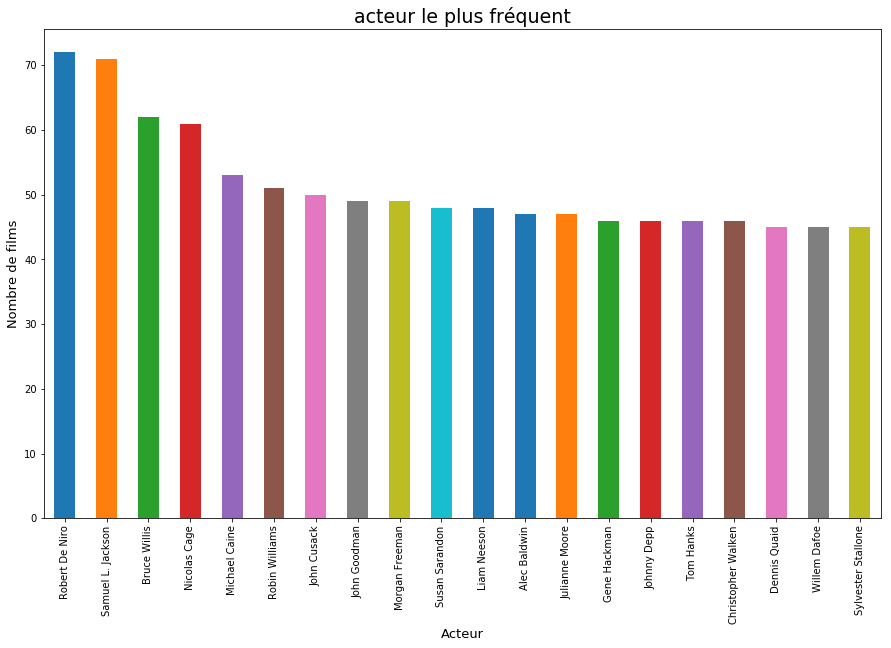

In [18]:
#créons une fonction qui enlévera les pipes(|) dans la colonne cast et qui 
# renvoyera tous les acteurs.
def total_cast(x):
    #concaténons tous les lignes de genres.
    data_plot = cp[x].str.cat(sep = '|')
    data = pd.Series(data_plot.split('|'))
    #comptons tous les acteurs 
    total = data.value_counts(ascending=False)
    return total

#appeler la  fonction pour compter tous les genres dans les films.
total_cast_films = total_cast('cast')
# tracer un tracé en bar pour 'genre vs nombre de films'.
total_cast_films.iloc[:20].plot.bar(figsize=(15,9))

plt.title("acteur le plus fréquent",fontsize=19)
plt.xlabel('Acteur',fontsize=13)
plt.ylabel("Nombre de films",fontsize= 13)
sns.set_style("whitegrid")



>Afin de répondre à notre première question nous avons créé une fonction total_cast afin de de compter les acteurs se trouvant dans une ligne pour ainsi trouver tous les acteurs dans la colonne cast pour les stocker dans une variable pour ainsi connaitre l'acteur le plus fréquent avec la fonction value_counts , enfin faire une visualisation pour confirmer

### Recherche pour la  Question 2  (Quel est le film qui a plus fait profit)

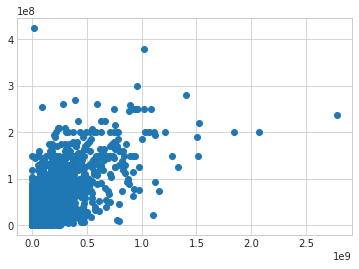

In [19]:
#relation entre revenue et budget ;
plt.scatter(x="revenue", y="budget", data=cp);

In [20]:
#ajoutons une nouvelle colonne profit dans notre dataset 
cp['Profit'] = cp['revenue'] - cp['budget']

In [21]:
#utilisons la fonction 'idmax()' pour trouver  l'indice du plus grand et 
#affichons cet indice 
def  le_plus_grand(x):
    plusgrand_ind = cp[x].idxmax()
    plus_grand = pd.DataFrame(cp.loc[plusgrand_ind,:])
    
    #affichons le film avec le plus de  profit
    print("Film avec le plus de profit "+ x + " : ",cp['original_title'][plusgrand_ind])
    return pd.concat([plus_grand],axis = 1)


#appelons notre fonction .
le_plus_grand('Profit')

Film avec le plus de profit Profit :  Avatar


,1386
id,19995
imdb_id,tt0499549
popularity,9.43277
budget,237000000
revenue,2781505847
original_title,Avatar
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...
director,James Cameron
overview,"In the 22nd century, a paraplegic Marine is di..."
runtime,162


>Pour répondre à cette question nous avons d'abord ajouter une nouvelle colonne profit à notre tramme puis ensuite créé une fonction le_plus_grand qui recherchera l'indice du film avec le plus de profit puis l'affichera .

<a id='conclusions'></a>
## Conclusions

> Afin de faire l'analyse de notre ensemble de données nous avons chargé notre dataset à partir d'un fichier csv , après cela nous avons eu un bref aperçu de cet ensemble , ensuite nous avons essayé de poser deux questions pour explorer nos données .
Ensuite nous avons nettoyé et explorer nos données.
Enfin pour répondre à nos questions nous pouvons dire que l 'acteur le plus fréquent est ***Robert De Niro*** , le film avec le plus de profit est ***Avatar***.



## Limites
>Dans notre projet le plus difficile pour nous a été la documentation, il n'ya pas de documents précis selon lesquels on peut s'en tenir ou vraiment fiable car plusieurs des bonnes informations sont facturés.
Aussi nous avons eu beaucoup de problèmes pour le nettoyage des données notamment pour les données manquantes ou il a été très difficile de gérer ce problème


In [22]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0